<a href="https://colab.research.google.com/github/adii2512/BML-Practical-s-/blob/main/Experiment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
df = pd.read_csv("iris.csv")

In [21]:
print(df.head())
print("Shape:", df.shape)
print("Columns:", df.columns)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Shape: (150, 6)
Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



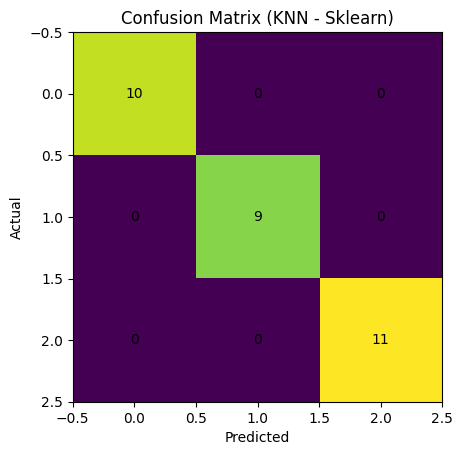

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix (KNN - Sklearn)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()

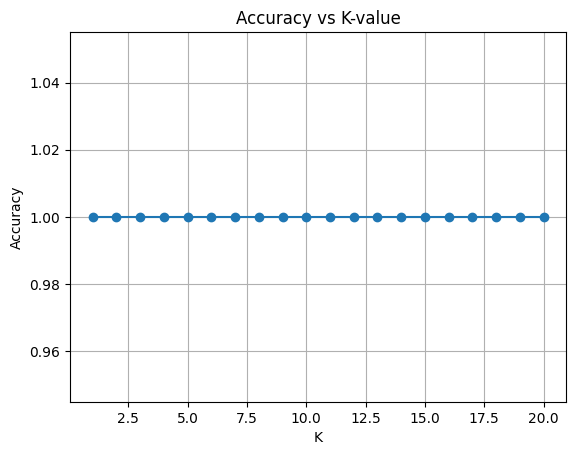

In [29]:
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred_k))

plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K-value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()